# Informations sur la base de données.

#### Buts de l'analyse

#### Étapes de traitement des données

#### Importation des librairies utilisées.

In [2]:
import os

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import scipy.stats as stats

%matplotlib inline
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# Pour la reproductibilité des résultats
np.random.seed(43)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

# AED

## Questions

### Questions préliminaires de l’AED

1. Quelles sont les descripteurs (colonnes) du data set ?

2. Combien d'enregistrements (lignes) ont été fournis ?

3. Quel est le format des données. Par exemple, dans quel format les dates sont fournies, existe-t-il des valeurs numériques, à quoi ressemblent les différentes valeurs catégorielles ?

4. Y a-t-il des valeurs manquantes ? Y a-t-il des variables avec un nombre élevé de valeurs manquantes ?

5. Est-ce que les classes sont-elles équilibrées ?

6. Est-ce qu'il y a des variables aberrantes ?

7. Laquelle des variables pourrait être utile à mon objectif ? 

8. Que représente une seule ligne de l'ensemble de données ? 

### Exploration plus approfondie des données

1. Numérique variable : Statistique descriptive 

* Quels sont les statistiques descriptives de base d’une variable numérique : count, mean, std, min, 25%, median, 75%, max

* Quelle est la plage d’une variable numérique ? 

* Les variables sont-elles fortement corrélées les unes aux autres ?

* Les variables sont-elles fortement corrélées avec le Target ?

2. Variable catégorielle

* Quelle est la valeur la plus fréquente pour une variable catégorielle ?

* Quelle est la moyenne d’une variable numérique regroupée par une variable catégorielle ?

* Combien de points de données y a-t-il, regroupés par 2 variables catégorielles ?

3. Visualisation des données

* Quelle est la distribution d’une variable numérique ? Y a-t-il des erreurs à gérer ?

* barchart (variable catégorielle univariante)

* heatmap (deux variable catégorielle)

* scatterplot (variable numérique bivarie)

* violon (for outliers : variable target)


### Recommandations 

### Analyse des forme

Variable target : Salaire horaire moyen, Difference salaire homme/femme

* **Ligne et colonne: (168300, 14)**

niveau de detail, une ligne par :
                  Géographie, 
                  Classification nationale des professions(CNP4),
                  Sexe,
                  Groupe d’âge,
                  Période de référence

* **Type de variables: 10 variables de type numérique et 4 variables qualitative.**

    * Géographie : Canada, Province ou territoire
    * Ratio du salaire hebdomadaire moyen entre les femmes et les hommes	
    * Ratio du salaire hebdomadaire médian entre les femmes et les hommes
    * Ratio du salaire horaire moyen entre les femmes et les hommes	
    * Ratio du salaire horaire médian entre les femmes et les hommes	
    * Salaire hebdomadaire moyen	
    * Salaire hebdomadaire médian	
    * Salaire horaire moyen	
    * Salaire horaire médian	
    * Total des employés, tous les salaires
    * Classification nationale des professions(CNP4)
    * Sexe
    * Groupe d’âge
    * Période de référence : annuelle (1997-2021)

La repartition des individus est egale pour toutes les modalites des variables Sexe, CNP, Groupe d'age

* **Type des valeurs manquantes**  

    * 25% des valeurs a 0 pour les variables 
        * Salaire hebdomadaire moyen	
        * Salaire hebdomadaire médian	
        * Salaire horaire moyen	
        * Salaire horaire médian
    
Il y a 48277(25%) des enregsitrements dont la valeur du salaire hebdomadaire moyen est egal a 0.

Repartition: 

CNP: 
* 2049 (1.37%), Superviseurs/superviseures et métiers techniques dans les ressources naturelles, l'agriculture et la production connexe, 
* 2106 (1.25%), Personnel des services de protection public de première ligne
* 2049	(1.22%) Cadres supérieurs/cadres supérieures [00]		

Regions:

* 4.60% (7743) dans Île-du-Prince-Édouard et Terre-Neuve-et-Labrador	
* 4.42% (5986)	Nouveau-Brunswick et Nouvelle-Écosse
* 1.56% (2628) Québec	   
    
* **Valeurs extremes **

On va supposer, pour l'exemple, que la base de données contient 0,5% de valeurs aberrantes de toutes sortes. Ce n'est pas exagéré. Cela représente $0,005*168300 \approx 841$ valeurs.

On utilise la méthode de la [forêt d'isolation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) pour détecter et éliminer un maximum de 0,5% des valeurs possiblement aberrantes.  
    
### Analyse de structure

* Calculer difference de Salaire horaire moyen entre  Salaire horaire moyen (homme)-  Salaire horaire moyen(femme)
* Conserver seulement les variables :  
    * Régions : Province ou territoire,
    * Salaire horaire moyen	
    * Classification nationale des professions(CNP4)
    * Sexe
    * Groupe d’âge
    * Période de référence : annuelle


### Nettoyage des donnees: Recommandations


* Filtrer la modalite "Les deux sexes" de la variable **Sexe**
* Filtrer la modalite "15 ans et plus" de la variable **Groupe d'âge**
* Filtrer la modalite "'Canada'" de la variable **Region**



# Partie I: Prétraitement des données.

## Lecture des bases de données en format CSV.

In [3]:
def load_db():
    salaire_employe_CNP = pd.read_csv("salaire_employe_CNP",sep=",")
   # duree_emploi_CNP=pd.read_csv("duree_emploi_CNP",sep=",")
   # postes_vacants_CNP=pd.read_csv("postes_vacants_CNP",sep=",")
  #  caractéristiques_population_active=pd.read_csv("caractéristiques_population_active",sep=",")
   # heures_habituellement_travaille=pd.read_csv("heures_habituellement_travaille",sep=",")
   # heures_effectivement_travaille=pd.read_csv("heures_effectivement_travaille",sep=",")
   # personnes_avec_plus_un_emploi=pd.read_csv("personnes_avec_plus_un_emploi",sep=",")
   # raison_quitter_emploi=pd.read_csv("raison_quitter_emploi",sep=",")
   # absence_travail_temps_plein=pd.read_csv("absence_travail_temps_plein",sep=",")
    return salaire_employe_CNP#,duree_emploi_CNP,postes_vacants_CNP,caractéristiques_population_active,heures_habituellement_travaille,heures_effectivement_travaille,personnes_avec_plus_un_emploi,raison_quitter_emploi,absence_travail_temps_plein

In [4]:
salaire_employe_CNP=load_db()
#,duree_emploi_CNP,postes_vacants_CNP,caractéristiques_population_active,heures_habituellement_travaille,heures_effectivement_travaille,personnes_avec_plus_un_emploi,raison_quitter_emploi,absence_travail_temps_plein=load_db()

## Explorer les données

In [5]:
salaire_employe_CNP.head(5)

,Année,Régions,CNP,Sexe,Groupe d'âge,Ratio du salaire hebdomadaire moyen entre les femmes et les hommes,Ratio du salaire hebdomadaire médian entre les femmes et les hommes,Ratio du salaire horaire moyen entre les femmes et les hommes,Ratio du salaire horaire médian entre les femmes et les hommes,Salaire hebdomadaire moyen,Salaire hebdomadaire médian,Salaire horaire moyen,Salaire horaire médian,"Total des employés, tous les salaires"
0,1997,Alberta,"Affaires, finance et administration [1]",Femmes,15 ans et plus,2.47,2.65,2.64,2.76,1166.64,1102.80,38.09,35.31,308.6
1,1997,Alberta,"Affaires, finance et administration [1]",Femmes,15 à 24 ans,2.65,2.91,2.66,2.58,781.71,766.00,25.98,24.08,36.8
2,1997,Alberta,"Affaires, finance et administration [1]",Femmes,25 à 54 ans,1.27,1.35,1.40,1.47,1009.26,961.70,27.57,26.13,231.2
3,1997,Alberta,"Affaires, finance et administration [1]",Femmes,55 ans et plus,1.18,1.40,1.32,1.50,926.89,947.60,26.17,26.01,17.4
4,1997,Alberta,"Affaires, finance et administration [1]",Hommes,15 ans et plus,0.00,0.00,0.00,0.00,1659.71,1488.53,46.72,41.72,102.3


In [6]:
salaire_employe_CNP.tail(5)

,Année,Régions,CNP,Sexe,Groupe d'âge,Ratio du salaire hebdomadaire moyen entre les femmes et les hommes,Ratio du salaire hebdomadaire médian entre les femmes et les hommes,Ratio du salaire horaire moyen entre les femmes et les hommes,Ratio du salaire horaire médian entre les femmes et les hommes,Salaire hebdomadaire moyen,Salaire hebdomadaire médian,Salaire horaire moyen,Salaire horaire médian,"Total des employés, tous les salaires"
168295,2021,Île-du-Prince-Édouard,Vente et services [6],Hommes,55 ans et plus,0.0,0.0,0.0,0.0,1838.07,1736.01,54.90,53.14,3.0
168296,2021,Île-du-Prince-Édouard,Vente et services [6],Les deux sexes,15 ans et plus,0.0,0.0,0.0,0.0,1485.61,1425.00,48.94,44.90,33.0
168297,2021,Île-du-Prince-Édouard,Vente et services [6],Les deux sexes,15 à 24 ans,0.0,0.0,0.0,0.0,1186.19,1083.00,43.22,40.40,12.2
168298,2021,Île-du-Prince-Édouard,Vente et services [6],Les deux sexes,25 à 54 ans,0.0,0.0,0.0,0.0,1678.38,1620.00,52.26,48.80,14.2
168299,2021,Île-du-Prince-Édouard,Vente et services [6],Les deux sexes,55 ans et plus,0.0,0.0,0.0,0.0,1624.59,1561.10,52.73,50.00,6.6


### Dimensions du dataset

In [7]:
print("Les dimensions du jeux des donnees: ", salaire_employe_CNP.shape)
print() 

Les dimensions du jeux des donnees:  (168300, 14)



In [8]:
# Size of our data set
## le nombre de lignes multiplié par le nombre de colonnes si DataFrame.
print("Nombre d’éléments:", salaire_employe_CNP.size)
print()

Nombre d’éléments: 2356200



Le nombre d'individus est égale à 168300 et le nombre de descripteurs est égale à 14

### Type des donnees

In [9]:
salaire_employe_CNP.dtypes

Année                                                                     int64
Régions                                                                  object
CNP                                                                      object
Sexe                                                                     object
Groupe d'âge                                                             object
Ratio du salaire hebdomadaire moyen entre les femmes et les hommes      float64
Ratio du salaire hebdomadaire médian entre les femmes et les hommes     float64
Ratio du salaire horaire moyen entre les femmes et les hommes           float64
Ratio du salaire horaire médian entre les femmes et les hommes          float64
Salaire hebdomadaire moyen                                              float64
Salaire hebdomadaire médian                                             float64
Salaire horaire moyen                                                   float64
Salaire horaire médian                  

In [10]:
salaire_employe_CNP.dtypes.value_counts()

float64    9
object     4
int64      1
dtype: int64

Le jeu des données a 10 variables de type numérique et 4 variables qualitative.

In [11]:
salaire_employe_CNP.describe()

,Année,Ratio du salaire hebdomadaire moyen entre les femmes et les hommes,Ratio du salaire hebdomadaire médian entre les femmes et les hommes,Ratio du salaire horaire moyen entre les femmes et les hommes,Ratio du salaire horaire médian entre les femmes et les hommes,Salaire hebdomadaire moyen,Salaire hebdomadaire médian,Salaire horaire moyen,Salaire horaire médian,"Total des employés, tous les salaires"
count,168300.000000,168300.000000,168300.000000,168300.000000,168300.000000,168300.000000,168300.000000,168300.000000,168300.000000,168300.000000
mean,2009.000000,0.407024,0.413882,0.425337,0.428602,1220.403628,1151.330992,34.931171,32.836662,99.278548
std,7.211124,0.847467,0.867719,0.877147,0.888077,1018.589217,973.103127,28.999519,27.648978,628.282828
min,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,0.000000,0.000000,0.000000,0.000000,1234.325000,1153.600000,35.590000,33.000000,6.500000
75%,2015.000000,0.000000,0.000000,0.000000,0.000000,1891.717500,1775.092500,53.460000,50.000000,37.800000
max,2021.000000,4.680000,7.710000,4.090000,4.920000,6472.390000,6923.200000,166.670000,176.210000,32395.200000


In [12]:
salaire_employe_CNP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168300 entries, 0 to 168299
Data columns (total 14 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   Année                                                                 168300 non-null  int64  
 1   Régions                                                               168300 non-null  object 
 2   CNP                                                                   168300 non-null  object 
 3   Sexe                                                                  168300 non-null  object 
 4   Groupe d'âge                                                          168300 non-null  object 
 5   Ratio du salaire hebdomadaire moyen entre les femmes et les hommes    168300 non-null  float64
 6   Ratio du salaire hebdomadaire médian entre les femmes et les hommes   168300 non-nul

* 25% de la population ont les informations sur les salaires avec la valeur 0
* 50% de la population ont le salaire moyenne hebdomadaire moins de 1234.3 et le salaire médian moins de 1153.6
* 50% de la population ont le salaire horaire moyenne au moins de 35.5, et le salaire horaire médiane moins de 33 dollars

In [13]:
salaire_employe_CNP.describe(include=[object])

,Régions,CNP,Sexe,Groupe d'âge
count,168300,168300,168300,168300
unique,11,51,3,4
top,Alberta,"Affaires, finance et administration [1]",Femmes,15 ans et plus
freq,15300,3300,56100,42075


* La variable Regions contient 11 modalites
* La variable CNP contient 51 modalites
* La variable Sexe contienttient 3 variables
* La variable Groupe d'age contient 4 variables

In [14]:
salaire_employe_CNP.Régions.unique()

array(['Alberta', 'Canada', 'Colombie-Britannique', 'Manitoba',
       'Nouveau-Brunswick', 'Nouvelle-Écosse', 'Ontario', 'Québec',
       'Saskatchewan', 'Terre-Neuve-et-Labrador', 'Île-du-Prince-Édouard'],
      dtype=object)

In [15]:
salaire_employe_CNP.Sexe.unique()

array(['Femmes', 'Hommes', 'Les deux sexes'], dtype=object)

In [16]:
salaire_employe_CNP["Groupe d'âge"].unique()

array(['15 ans et plus', '15 à 24 ans', '25 à 54 ans', '55 ans et plus'],
      dtype=object)

### Renommage

In [17]:
#operation de trim
cols = salaire_employe_CNP.select_dtypes(object).columns
salaire_employe_CNP[cols] = salaire_employe_CNP[cols].apply(lambda x: x.str.strip())

In [18]:
salaire_employe_CNP.rename(columns = {'Ratio du salaire hebdomadaire moyen entre les femmes et les hommes ':"Ratio_salaire_hebdo_moyen"},inplace=True)
salaire_employe_CNP.rename(columns = {'Ratio du salaire hebdomadaire médian entre les femmes et les hommes ':"Ratio_salaire_hebdo_median"},inplace=True)
salaire_employe_CNP.rename(columns = {'Ratio du salaire horaire moyen entre les femmes et les hommes':"Ratio_salaire_horaire_moyen"},inplace=True)
salaire_employe_CNP.rename(columns = {"Ratio du salaire horaire médian entre les femmes et les hommes ":"Ratio_salaire_horaire_median"},inplace=True)

In [19]:
salaire_employe_CNP.columns

Index(['Année', 'Régions', 'CNP', 'Sexe', 'Groupe d'âge',
       'Ratio_salaire_hebdo_moyen', 'Ratio_salaire_hebdo_median',
       'Ratio_salaire_horaire_moyen', 'Ratio_salaire_horaire_median',
       'Salaire hebdomadaire moyen', 'Salaire hebdomadaire médian',
       'Salaire horaire moyen', 'Salaire horaire médian',
       'Total des employés, tous les salaires'],
      dtype='object')

## Visualisation des données

In [20]:
salaire_employe_CNP.columns

Index(['Année', 'Régions', 'CNP', 'Sexe', 'Groupe d'âge',
       'Ratio_salaire_hebdo_moyen', 'Ratio_salaire_hebdo_median',
       'Ratio_salaire_horaire_moyen', 'Ratio_salaire_horaire_median',
       'Salaire hebdomadaire moyen', 'Salaire hebdomadaire médian',
       'Salaire horaire moyen', 'Salaire horaire médian',
       'Total des employés, tous les salaires'],
      dtype='object')

### Annee

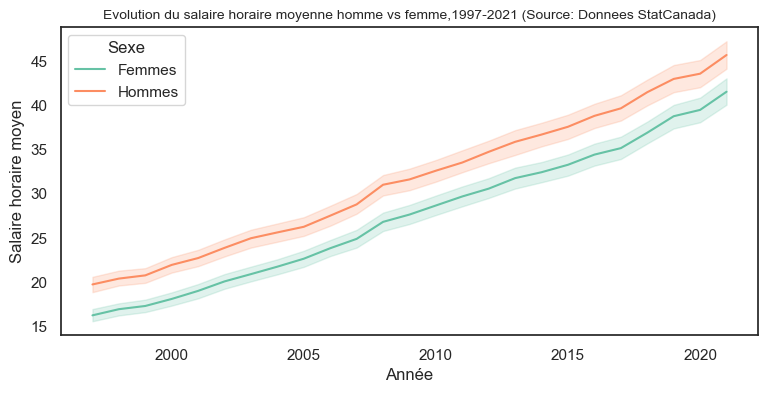

In [21]:
filtre_sexe=salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])
sns.lineplot(data=salaire_employe_CNP[filtre_sexe], 
             x="Année", 
             y='Salaire horaire moyen',
             hue='Sexe',
            markers=True,
            dashes=False)
plt.title(label='Evolution du salaire horaire moyenne homme vs femme,1997-2021 (Source: Donnees StatCanada)',
          fontdict={'fontsize':10}, loc='center')
plt.show()

In [ ]:
sns.lineplot()

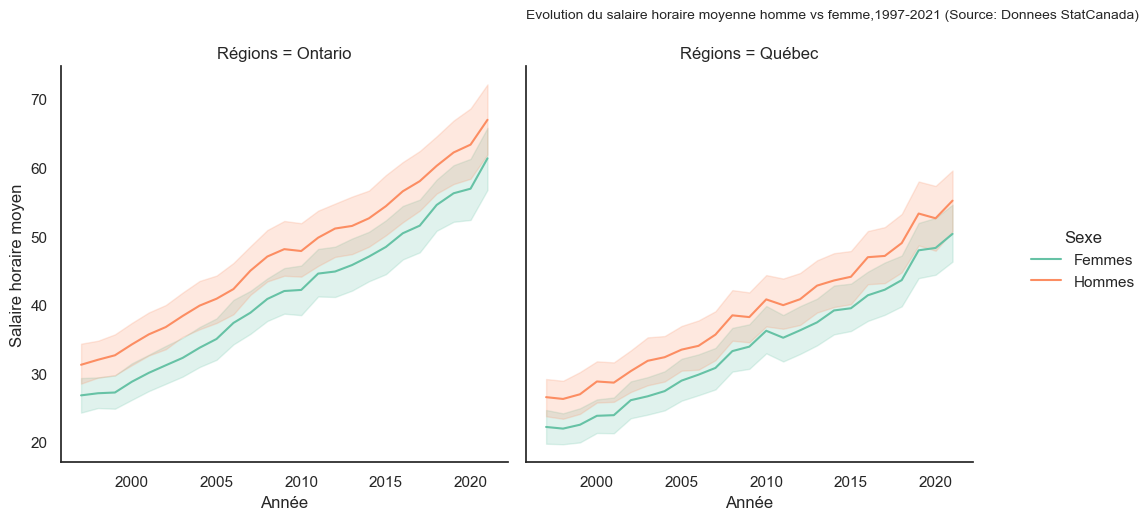

In [183]:
filtre_sexe_Ont_Qc=(salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])) & (salaire_employe_CNP['Régions'].isin(['Ontario','Québec']))
sns.relplot(data=salaire_employe_CNP[filtre_sexe_Ont_Qc],
             x="Année", 
             y='Salaire horaire moyen',
             hue='Sexe',
             col='Régions',
             kind='line',
             #markers=True, 
            dashes=True
            
            )
plt.title(label='Evolution du salaire horaire moyenne homme vs femme,1997-2021 (Source: Donnees StatCanada)',
          fontdict={'fontsize':10}, loc='left',y=1.1)
plt.show()

L'ecart salarial homme femme reste constante aux fil des annee.

### Groupe d'age

In [23]:
salaire_employe_CNP.columns

Index(['Année', 'Régions', 'CNP', 'Sexe', 'Groupe d'âge',
       'Ratio_salaire_hebdo_moyen', 'Ratio_salaire_hebdo_median',
       'Ratio_salaire_horaire_moyen', 'Ratio_salaire_horaire_median',
       'Salaire hebdomadaire moyen', 'Salaire hebdomadaire médian',
       'Salaire horaire moyen', 'Salaire horaire médian',
       'Total des employés, tous les salaires'],
      dtype='object')

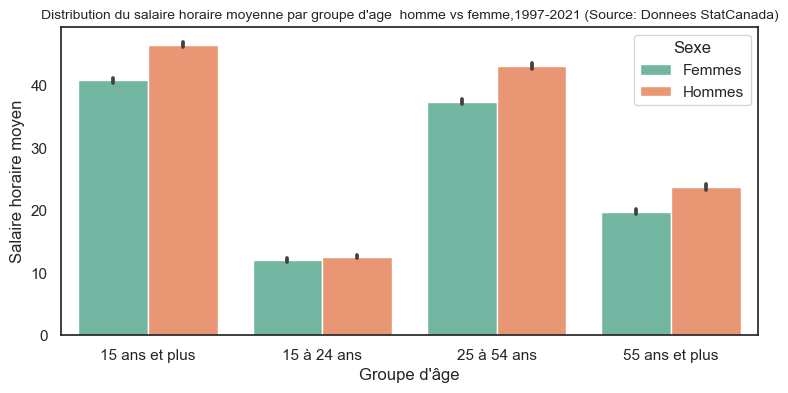

In [27]:
filtre_sexe=salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])
sns.barplot(data=salaire_employe_CNP[filtre_sexe], 
             x="Groupe d'âge", 
             y='Salaire horaire moyen',
             hue='Sexe')
plt.title(label="Distribution du salaire horaire moyenne par groupe d'age  homme vs femme,1997-2021 (Source: Donnees StatCanada)",
          fontdict={'fontsize':10}, loc='center')
plt.show()

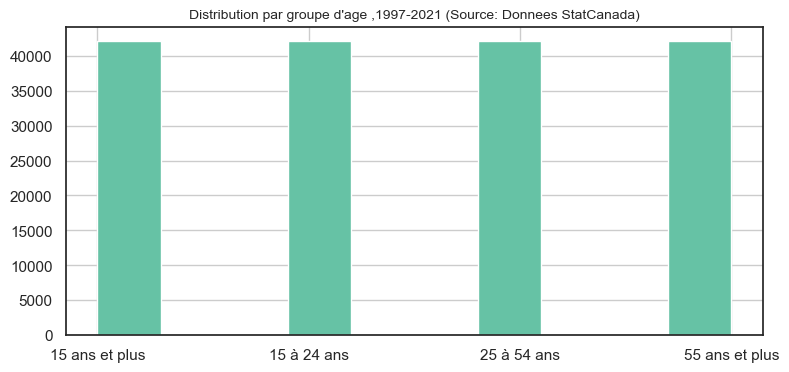

In [29]:
salaire_employe_CNP["Groupe d'âge"].hist()
plt.title(label="Distribution par groupe d'age ,1997-2021 (Source: Donnees StatCanada)",
          fontdict={'fontsize':10}, loc='center')
plt.show()

Le salaire horaire moyenne manque dans toutes les modalités de la variable groupe d'age.  

### Regions 

### Distribution des effectifs par region, region /sexe

In [154]:
salaire_employe_CNP[['Régions','Sexe']].value_counts().sort_index()

Régions                  Sexe          
Alberta                  Femmes            5100
                         Hommes            5100
                         Les deux sexes    5100
Canada                   Femmes            5100
                         Hommes            5100
                         Les deux sexes    5100
Colombie-Britannique     Femmes            5100
                         Hommes            5100
                         Les deux sexes    5100
Manitoba                 Femmes            5100
                         Hommes            5100
                         Les deux sexes    5100
Nouveau-Brunswick        Femmes            5100
                         Hommes            5100
                         Les deux sexes    5100
Nouvelle-Écosse          Femmes            5100
                         Hommes            5100
                         Les deux sexes    5100
Ontario                  Femmes            5100
                         Hommes            5100


<Figure size 800x1200 with 0 Axes>

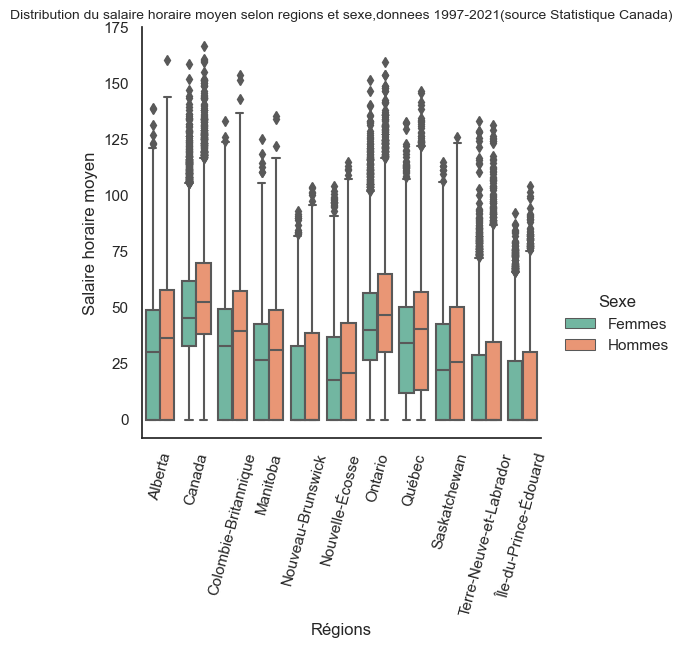

In [196]:
#sal_empl_sexe=salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])
filtre_sexe=salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])

plt.figure(figsize=(8,12))
sns.catplot(data=salaire_employe_CNP[filtre_sexe], x="Régions", 
            y="Salaire horaire moyen", 
            kind="box",
            hue='Sexe',
            #palette="pastel",
           dodge=True)
plt.title(label="Distribution du salaire horaire moyen selon regions et sexe,donnees 1997-2021(source Statistique Canada)",
          fontdict={'fontsize':10}, loc='center')
plt.xticks(rotation=75)
plt.show()

La médiane du salaire horaire moyenne pour les femmes est inférieure à celle des hommes, pour toutes les provinces.

La variable salaire horaire moyenne contient des valeurs a 0 dans la plupart des provinces excepte  Ontario , Québec et l’ensemble du Canada.


### CNP

In [231]:
salaire_employe_CNP[['CNP','Sexe']].value_counts().sort_index()

CNP                                         Sexe          
Affaires, finance et administration [1]     Femmes            1100
                                            Hommes            1100
                                            Les deux sexes    1100
Arts, culture, sports et loisirs [5]        Femmes            1100
                                            Hommes            1100
                                                              ... 
Total des employés, toutes les professions  Hommes            1100
                                            Les deux sexes    1100
Vente et services [6]                       Femmes            1100
                                            Hommes            1100
                                            Les deux sexes    1100
Length: 153, dtype: int64

### Analyse de la variable salaire hebdomadaire 

#### Valeurs aberantes 


Les boxplots sont un moyen standard d’afficher la distribution d’une variable en utilisant le premier quartile, la médiane, le troisième quartile et les moustaches.

* La médiane, indiquée par la ligne à l’intérieur de l’encadré.
* La fourchette interquantile (IQR), la boîte elle-même.
* Les quantiles, le 25e (Q1) est l’extrémité inférieure et le 75e (Q3) l’extrémité supérieure de la boîte.
* Les moustaches, qui s’étendent jusqu’à :
* la moustache supérieure : Q3 + 1,5 x IQR
* moustache inférieure : Q1 -1,5 x IQR

Diagramme de probabilite:
https://www.mathworks.com/help/stats/probplot.html

* genere la diagramme de probabilite de donnees d'un echantillon par rapport aux quantils de la loi normale.
* la fonction **probplot** calcule eventuellement une ligne mieux adapte aux donnees

In [15]:
salaire_employe_CNP.columns

Index(['Année', 'Régions', 'CNP', 'Sexe', 'Groupe d'âge',
       'Ratio_salaire_hebdo_moyen', 'Ratio_salaire_hebdo_median',
       'Ratio_salaire_horaire_moyen', 'Ratio_salaire_horaire_median',
       'Salaire hebdomadaire moyen', 'Salaire hebdomadaire médian',
       'Salaire horaire moyen', 'Salaire horaire médian',
       'Total des employés, tous les salaires'],
      dtype='object')

In [34]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # histogramme
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('histogramme')

    # Q-Q 
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

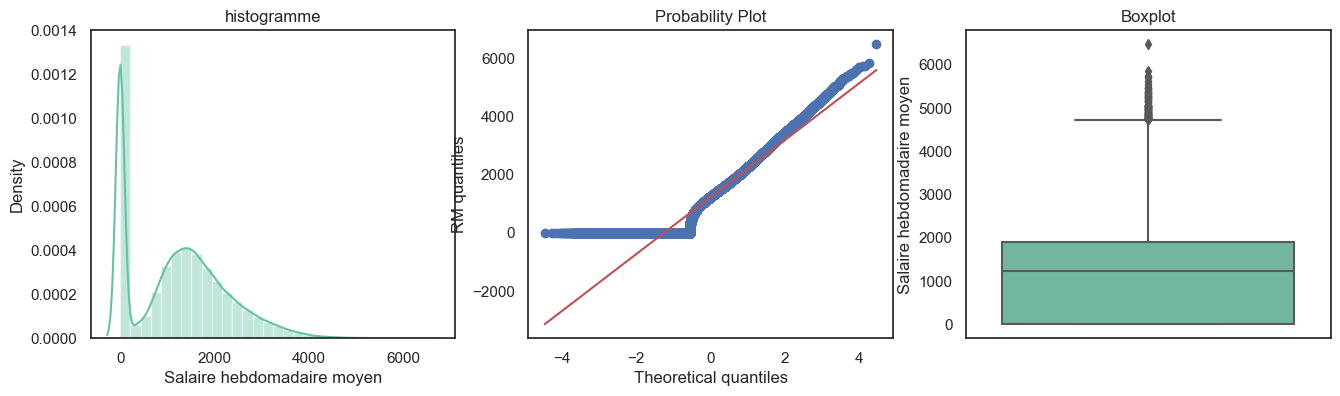

In [37]:
diagnostic_plots(salaire_employe_CNP,"Salaire hebdomadaire moyen")

In [40]:
salaire_employe_CNP["Salaire hebdomadaire moyen"].describe()

count    168300.000000
mean       1220.403628
std        1018.589217
min           0.000000
25%           0.000000
50%        1234.325000
75%        1891.717500
max        6472.390000
Name: Salaire hebdomadaire moyen, dtype: float64

La distribution du salaire hebdomadaire moyen est bimodale asymétrique positive. 
Elle est inclinée avec une queue vers la droite. 
Selon le boxplot, il y a quelques valeurs aberrantes à l’extrémité droite de la distribution de la variable.

25% des donnees ont le salaire hebdomadaire moyenne a 0. 

##### Methode boxplot

In [188]:
def find_skewed_boundaries(df, variable, distance):

    # Calculons les limites en dehors desquelles se situent les valeurs aberrantes
    # pour les distributions biaisées

    # la distance passée en argument, nous donne la possibilité de
    # estimer 1,5 fois ou 3 fois le RQI à calculer
    # les limites.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [190]:
upper_boundary, lower_boundary=find_skewed_boundaries(salaire_employe_CNP,'Salaire hebdomadaire moyen',1.5)
upper_boundary, lower_boundary

(4729.29375, -2837.57625)

In [195]:
# examinons le nombre et le pourcentage de valeurs aberrantes
# pour la cote de la dernière course

print('Nombre de individus: {}'.format(len(salaire_employe_CNP)))
print()
print('Individus dont le salaire hebdomadaire moyen avec une valeur > 4729.2 : {}'.format(
    len(salaire_employe_CNP[salaire_employe_CNP['Salaire hebdomadaire moyen'] > upper_boundary])))
print()
print('% Individus dont le salaire hebdomadaire moyen avec une valeur > 4729.2 : {}'.format(
    len(salaire_employe_CNP[salaire_employe_CNP['Salaire hebdomadaire moyen'] > upper_boundary])/len(salaire_employe_CNP)*100))

Nombre de individus: 168300

Individus dont le salaire hebdomadaire moyen avec une valeur > 4729.2 : 155

% Individus dont le salaire hebdomadaire moyen avec une valeur > 4729.2 : 0.09209744503862151


La limite supérieure indique une valeur de ~4729.2.
La limite inférieure est négative, mais la variable salaire hebdomadaire moyen ne prend pas de valeur négative. 

Pour calculer les valeurs aberrantes du salaire hebdomadaire moyen, nous n’utilisons donc que la limite supérieure.
Les valeurs aberrantes se situent uniquement à la queue droite de la distribution de celle-ci.

Nous observons 155 cas, soit 0,9 % de l’ensemble de données, avec des valeurs extrêmement élevées pour le salaire.

##### Methode forêt d'isolation

Dans ce qui suit, on va supposer, pour l'exemple, que la base de données contient 0,5% de valeurs aberrantes de toutes sortes. Ce n'est pas exagéré. Cela représente $0,005*168300 \approx 841$ valeurs.

On utilise la méthode de la [forêt d'isolation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) pour détecter et éliminer un maximum de 0,5% des valeurs possiblement aberrantes. 

In [212]:
from sklearn.ensemble import IsolationForest
# Trouvons les valeurs aberrantes; la variable 'outlier' vaut -1 
# pour les valeurs aberrantes et +1 pour les autres.
i_forest = IsolationForest(contamination= 0.005, random_state=42)
salaire_employe_CNP_=salaire_employe_CNP
salaire_employe_CNP_['outliers'] = i_forest.fit(np.array(salaire_employe_CNP['Salaire hebdomadaire moyen']).reshape(-1, 1)).predict(np.array(salaire_employe_CNP['Salaire hebdomadaire moyen']).reshape(-1, 1))

# Affichons les 15 premières données de la base de données
salaire_employe_CNP_[salaire_employe_CNP_['outliers']==-1].head(15)

,Année,Régions,CNP,Sexe,Groupe d'âge,Ratio_salaire_hebdo_moyen,Ratio_salaire_hebdo_median,Ratio_salaire_horaire_moyen,Ratio_salaire_horaire_median,Salaire hebdomadaire moyen,Salaire hebdomadaire médian,Salaire horaire moyen,Salaire horaire médian,"Total des employés, tous les salaires",outliers
64327,2006,Ontario,Cadres supérieurs/cadres supérieures [00],Hommes,55 ans et plus,0.0,0.0,0.0,0.0,4265.00,4278.75,97.94,95.69,12.3,-1
74728,2008,Canada,Cadres supérieurs/cadres supérieures [00],Hommes,15 ans et plus,0.0,0.0,0.0,0.0,4127.08,3799.08,114.11,103.70,93.1,-1
74734,2008,Canada,Cadres supérieurs/cadres supérieures [00],Les deux sexes,25 à 54 ans,0.0,0.0,0.0,0.0,4225.78,3705.40,118.65,106.25,97.1,-1
80848,2009,Alberta,Cadres supérieurs/cadres supérieures [00],Hommes,15 ans et plus,0.0,0.0,0.0,0.0,4784.14,4615.20,112.53,107.37,9.9,-1
80850,2009,Alberta,Cadres supérieurs/cadres supérieures [00],Hommes,25 à 54 ans,0.0,0.0,0.0,0.0,5150.62,5346.00,120.98,115.38,7.2,-1
80852,2009,Alberta,Cadres supérieurs/cadres supérieures [00],Les deux sexes,15 ans et plus,0.0,0.0,0.0,0.0,4243.06,4038.25,100.97,96.00,14.1,-1
80854,2009,Alberta,Cadres supérieurs/cadres supérieures [00],Les deux sexes,25 à 54 ans,0.0,0.0,0.0,0.0,4517.05,4615.00,106.95,101.88,10.2,-1
81223,2009,Alberta,Personnel professionnel du droit et des servic...,Hommes,55 ans et plus,0.0,0.0,0.0,0.0,4464.79,3769.13,107.95,100.51,4.1,-1
81451,2009,Canada,Cadres intermédiaires spécialisés/cadres inter...,Hommes,55 ans et plus,0.0,0.0,0.0,0.0,4253.78,4060.00,129.95,117.59,80.2,-1
82074,2009,Colombie-Britannique,Cadres supérieurs/cadres supérieures [00],Hommes,25 à 54 ans,0.0,0.0,0.0,0.0,4162.95,3769.50,98.57,94.24,7.1,-1


In [213]:
salaire_employe_CNP_[salaire_employe_CNP_['outliers']==-1].shape

(840, 15)

#### salaires hebdomandaire moyenne a 0

In [42]:
filtre_salaire0=salaire_employe_CNP["Salaire hebdomadaire moyen"]==0

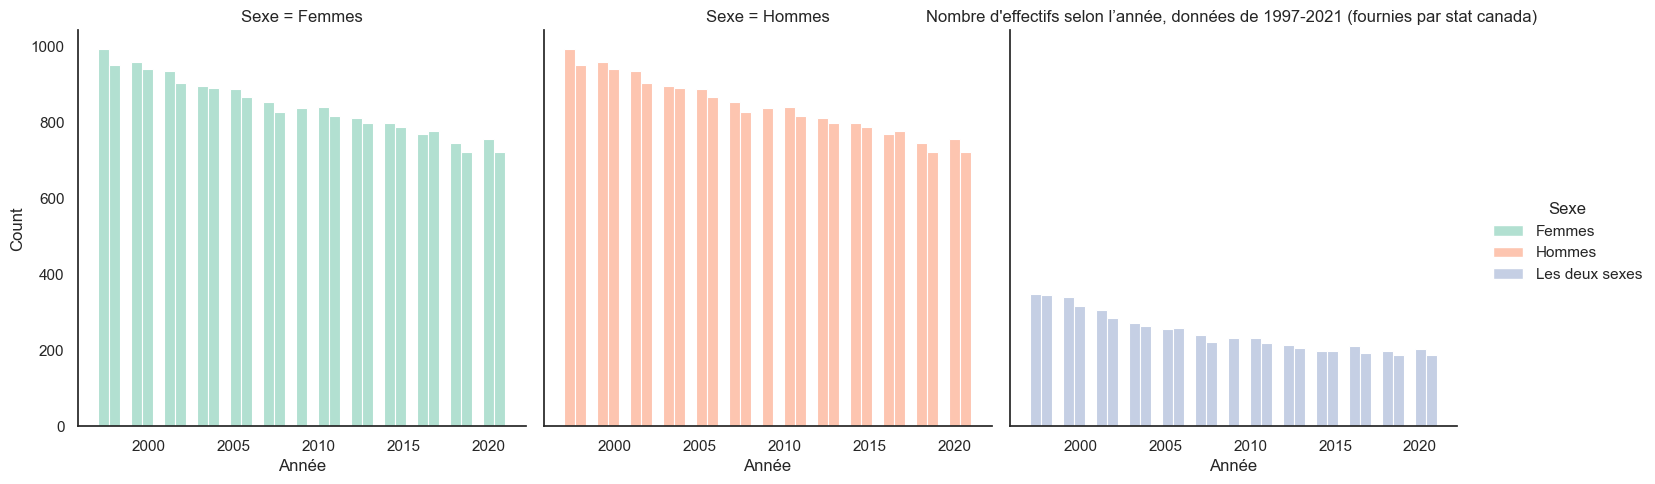

In [81]:
sns.displot(salaire_employe_CNP[filtre_salaire0] ,x="Année",hue='Sexe',col="Sexe")
plt.ylabel("Nbr effectifs")
plt.title("Nombre d'effectifs selon l’année, données de 1997-2021 (fournies par stat canada) ")
plt.show()
plt.show()

In [63]:
y=salaire_employe_CNP['Salaire hebdomadaire moyen'][filtre_salaire0].value_counts()
y

0.0    48277
Name: Salaire hebdomadaire moyen, dtype: int64

In [69]:
salaire_employe_CNP[['Salaire hebdomadaire moyen','Sexe']][filtre_salaire0].groupby('Sexe').value_counts()

Sexe            Salaire hebdomadaire moyen
Femmes          0.0                           21072
Hommes          0.0                           21072
Les deux sexes  0.0                            6133
dtype: int64

In [238]:
effectifs=pd.Series(salaire_employe_CNP[filtre_salaire0]['CNP'].value_counts()).sort_values(ascending=True)
frequence=round((effectifs/salaire_employe_CNP.shape[0])*100,2)
sommaire_Ind=pd.concat([effectifs,frequence], axis=1,keys=['Eff.',"Freq"])
sommaire_Ind['EffectCumulle']=sommaire_Ind['Eff.'].cumsum()
sommaire_Ind['FreqCumulle']= sommaire_Ind['Freq'].cumsum()
sommaire_Ind

,Eff.,Freq,EffectCumulle,FreqCumulle
"Personnel de soutien en service et autre personnel de service, n.c.a. [67]",28,0.02,28,0.02
"Affaires, finance et administration [1]",30,0.02,58,0.04
Représentants/représentantes des ventes et vendeurs/vendeuses - commerce de gros et de détail [64],81,0.05,139,0.09
"Enseignement, droit et services sociaux, communautaires et gouvernementaux [4]",104,0.06,243,0.15
Représentants/représentantes de services et autre personnel de services à la clientèle et personnalisés [65],154,0.09,397,0.24
Personnel de supervision en services et personnel de services spécialisés [63],202,0.12,599,0.36
Personnel de soutien des ventes [66],344,0.20,943,0.56
Fabrication et services d'utilité publique [9],374,0.22,1317,0.78
Gestion [0],400,0.24,1717,1.02
Sciences naturelles et appliquées et domaines apparentés [2],467,0.28,2184,1.30


In [239]:
effectifs=pd.Series(salaire_employe_CNP[filtre_salaire0]['Régions'].value_counts()).sort_values(ascending=True)
frequence=round((effectifs/salaire_employe_CNP.shape[0])*100,2)
sommaire_Ind=pd.concat([effectifs,frequence], axis=1,keys=['Eff.',"Freq"])
sommaire_Ind['EffectCumulle']=sommaire_Ind['Eff.'].cumsum()
sommaire_Ind['FreqCumulle']= sommaire_Ind['Freq'].cumsum()
sommaire_Ind

,Eff.,Freq,EffectCumulle,FreqCumulle
Canada,623,0.37,623,0.37
Ontario,1703,1.01,2326,1.38
Québec,2628,1.56,4954,2.94
Colombie-Britannique,3686,2.19,8640,5.13
Alberta,4081,2.42,12721,7.55
Manitoba,4140,2.46,16861,10.01
Saskatchewan,4965,2.95,21826,12.96
Nouvelle-Écosse,5280,3.14,27106,16.10
Nouveau-Brunswick,5986,3.56,33092,19.66
Terre-Neuve-et-Labrador,7442,4.42,40534,24.08


Il y a 48277(25%) des enregsitrements dont la valeur du salaire hebdomadaire moyen est egal a 0.

Repartition: 

CNP: 
* 2049 (1.37%), Superviseurs/superviseures et métiers techniques dans les ressources naturelles, l'agriculture et la production connexe, 
* 2106 (1.25%), Personnel des services de protection public de première ligne
* 2049	(1.22%) Cadres supérieurs/cadres supérieures [00]		

Regions:

* 4.60% (7743) dans Île-du-Prince-Édouard et Terre-Neuve-et-Labrador	
* 4.42% (5986)	Nouveau-Brunswick et Nouvelle-Écosse
* 1.56% (2628) Québec	
 

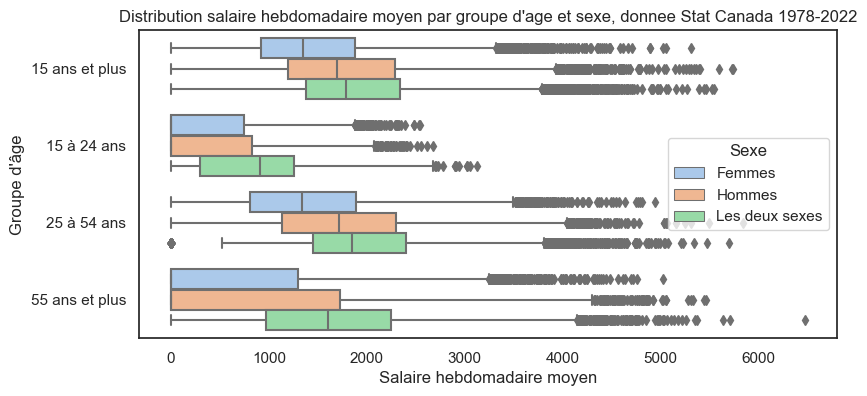

In [24]:
sns.boxplot(x=salaire_employe_CNP["Salaire hebdomadaire moyen"],
            y=salaire_employe_CNP["Groupe d\'âge"],
            hue=salaire_employe_CNP.Sexe,
           palette='pastel')
plt.title("Distribution salaire hebdomadaire moyen par groupe d'age et sexe, donnee Stat Canada 1997-2021")
plt.show()

In [20]:
# Exclure la modalite "Les deux sexes"
filtre_sexe=salaire_employe_CNP['Sexe']!="Les deux sexes"
#salaire_employe_CNP.loc[filtre_sexe]

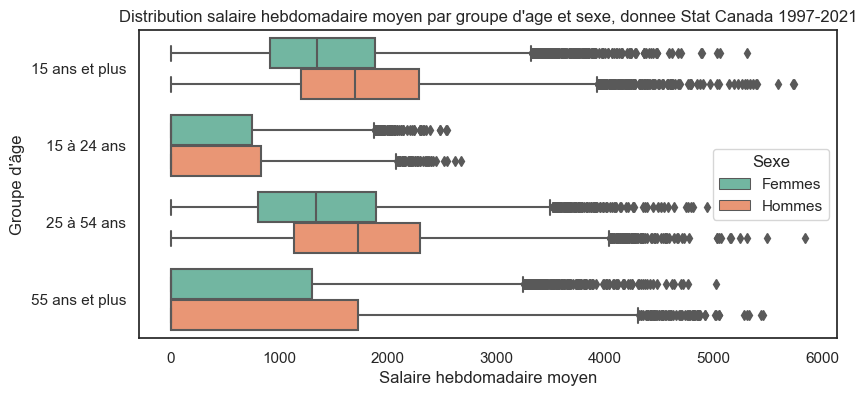

In [32]:
sns.boxplot(x=salaire_employe_CNP["Salaire hebdomadaire moyen"][filtre_sexe],
            y=salaire_employe_CNP["Groupe d\'âge"],
            hue=pd.Series(salaire_employe_CNP.Sexe[filtre_sexe]),
            saturation=0.75,
            #dodge=False,
        
           )
plt.title("Distribution salaire hebdomadaire moyen par groupe d'age et sexe, donnee Stat Canada 1997-2021")
plt.show()

### Salaire horaire moyen

In [223]:
from sklearn.ensemble import IsolationForest
# Trouvons les valeurs aberrantes; la variable 'outlier' vaut -1 
# pour les valeurs aberrantes et +1 pour les autres.
i_forest = IsolationForest(contamination= 0.005, random_state=42)
salaire_employe_CNP_=salaire_employe_CNP
salaire_employe_CNP_['outliers_horaire'] = i_forest.fit(np.array(salaire_employe_CNP['Salaire horaire moyen']).reshape(-1, 1)).predict(np.array(salaire_employe_CNP['Salaire horaire moyen']).reshape(-1, 1))

# Affichons les 15 premières données de la base de données
salaire_employe_CNP_[salaire_employe_CNP_['outliers_horaire']==-1].head(15)

,Année,Régions,CNP,Sexe,Groupe d'âge,Ratio_salaire_hebdo_moyen,Ratio_salaire_hebdo_median,Ratio_salaire_horaire_moyen,Ratio_salaire_horaire_median,Salaire hebdomadaire moyen,Salaire hebdomadaire médian,Salaire horaire moyen,Salaire horaire médian,"Total des employés, tous les salaires",outliers,outliers_horaire
72067,2007,Québec,Personnel professionnel en services d'enseigne...,Hommes,55 ans et plus,0.0,0.0,0.0,0.0,3486.13,3267.30,121.88,120.21,20.6,1,-1
75083,2008,Canada,Personnel professionnel des sciences naturelle...,Les deux sexes,55 ans et plus,0.0,0.0,0.0,0.0,3969.68,3955.15,124.02,124.65,92.1,1,-1
75091,2008,Canada,Personnel professionnel des soins de santé (sa...,Hommes,55 ans et plus,0.0,0.0,0.0,0.0,3879.14,3412.00,125.33,114.28,10.2,1,-1
78799,2008,Québec,Personnel professionnel en services d'enseigne...,Hommes,55 ans et plus,0.0,0.0,0.0,0.0,3452.69,3261.59,124.90,122.92,21.4,1,-1
81451,2009,Canada,Cadres intermédiaires spécialisés/cadres inter...,Hommes,55 ans et plus,0.0,0.0,0.0,0.0,4253.78,4060.00,129.95,117.59,80.2,-1,-1
81823,2009,Canada,Personnel professionnel des soins de santé (sa...,Hommes,55 ans et plus,0.0,0.0,0.0,0.0,3907.69,3733.75,127.17,126.03,11.4,1,-1
84571,2009,Ontario,Gestion [0],Hommes,55 ans et plus,0.0,0.0,0.0,0.0,4047.22,3605.40,124.45,109.44,82.7,1,-1
88183,2010,Canada,Cadres intermédiaires spécialisés/cadres inter...,Hommes,55 ans et plus,0.0,0.0,0.0,0.0,4214.91,4269.20,127.41,123.57,87.8,-1,-1
88555,2010,Canada,Personnel professionnel des soins de santé (sa...,Hommes,55 ans et plus,0.0,0.0,0.0,0.0,3779.21,3814.80,127.81,137.40,12.6,1,-1
91303,2010,Ontario,Gestion [0],Hommes,55 ans et plus,0.0,0.0,0.0,0.0,4167.52,4061.60,124.80,121.61,93.4,-1,-1


In [224]:
salaire_employe_CNP_[salaire_employe_CNP_['outliers_horaire']==-1].shape

(759, 16)

In [227]:
# individus dont le valeurs de salaire extreme sont differents de salaire horaire extreme
f1=(salaire_employe_CNP_['outliers_horaire']==-1) & (salaire_employe_CNP_['outliers']!=-1)
salaire_employe_CNP_[f1]

,Année,Régions,CNP,Sexe,Groupe d'âge,Ratio_salaire_hebdo_moyen,Ratio_salaire_hebdo_median,Ratio_salaire_horaire_moyen,Ratio_salaire_horaire_median,Salaire hebdomadaire moyen,Salaire hebdomadaire médian,Salaire horaire moyen,Salaire horaire médian,"Total des employés, tous les salaires",outliers,outliers_horaire
72067,2007,Québec,Personnel professionnel en services d'enseigne...,Hommes,55 ans et plus,0.00,0.00,0.00,0.00,3486.13,3267.30,121.88,120.21,20.6,1,-1
75083,2008,Canada,Personnel professionnel des sciences naturelle...,Les deux sexes,55 ans et plus,0.00,0.00,0.00,0.00,3969.68,3955.15,124.02,124.65,92.1,1,-1
75091,2008,Canada,Personnel professionnel des soins de santé (sa...,Hommes,55 ans et plus,0.00,0.00,0.00,0.00,3879.14,3412.00,125.33,114.28,10.2,1,-1
78799,2008,Québec,Personnel professionnel en services d'enseigne...,Hommes,55 ans et plus,0.00,0.00,0.00,0.00,3452.69,3261.59,124.90,122.92,21.4,1,-1
81823,2009,Canada,Personnel professionnel des soins de santé (sa...,Hommes,55 ans et plus,0.00,0.00,0.00,0.00,3907.69,3733.75,127.17,126.03,11.4,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166943,2021,Saskatchewan,Personnel professionnel en soins infirmiers [30],Les deux sexes,55 ans et plus,0.00,0.00,0.00,0.00,3971.44,4180.99,128.81,138.00,5.0,1,-1
167532,2021,Terre-Neuve-et-Labrador,Personnel professionnel en services d'enseigne...,Femmes,15 ans et plus,3.38,4.11,3.08,3.05,3755.57,4053.00,128.69,136.61,13.2,1,-1
167536,2021,Terre-Neuve-et-Labrador,Personnel professionnel en services d'enseigne...,Hommes,15 ans et plus,0.00,0.00,0.00,0.00,3542.19,3500.45,125.53,134.03,6.2,1,-1
167540,2021,Terre-Neuve-et-Labrador,Personnel professionnel en services d'enseigne...,Les deux sexes,15 ans et plus,0.00,0.00,0.00,0.00,3690.83,3869.40,127.73,135.82,19.4,1,-1


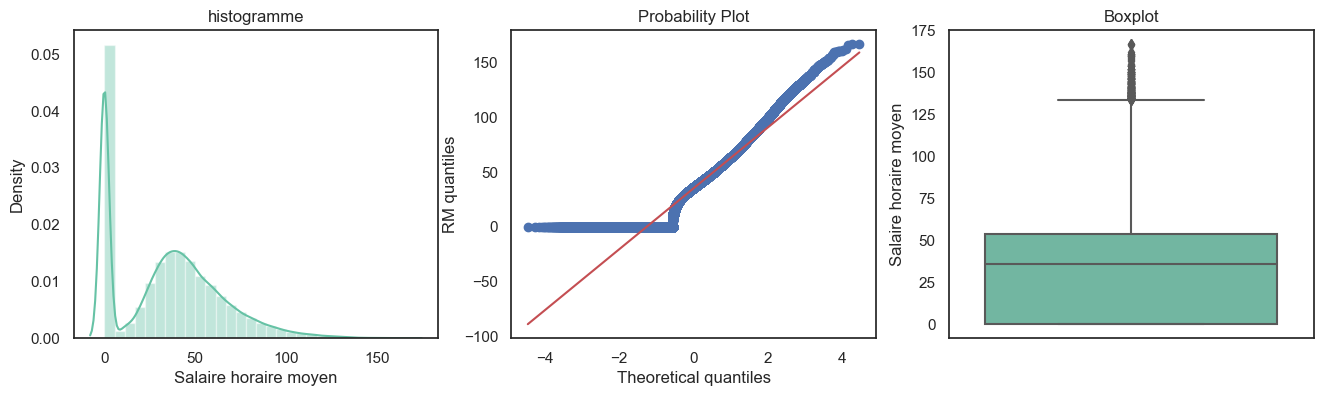

In [228]:
diagnostic_plots(salaire_employe_CNP, "Salaire horaire moyen")

In [6]:
salaire_employe_CNP[salaire_employe_CNP["Salaire horaire moyen"]!=0.0]["Salaire horaire moyen"].describe()

count    120023.000000
mean         48.981579
std          22.159045
min           5.540000
25%          33.250000
50%          45.010000
75%          60.900000
max         166.670000
Name: Salaire horaire moyen, dtype: float64

<AxesSubplot:xlabel='Salaire horaire moyen', ylabel='Density'>

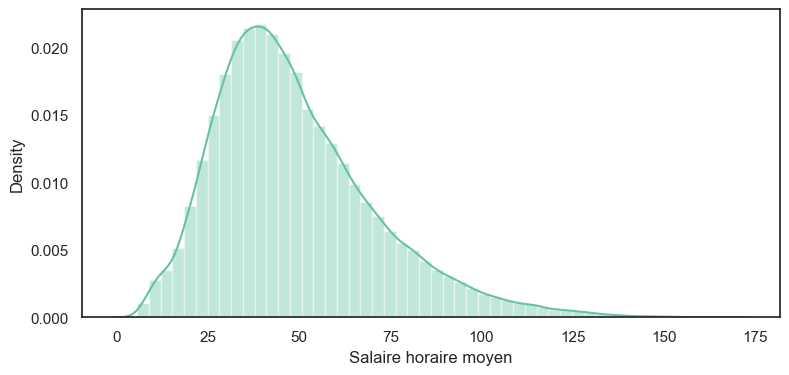

In [5]:
sns.distplot(salaire_employe_CNP[salaire_employe_CNP["Salaire horaire moyen"]!=0.0]["Salaire horaire moyen"])

# Annexe 

In [221]:
# Quartille 
Q1=salaire_employe_CNP['Salaire horaire moyen'].quantile(q=0.25)
Q3=salaire_employe_CNP["Salaire horaire moyen"].quantile(q=0.75)
IQR=Q3-Q1
print("1er quantile Q1:",Q1)
print("3em quantile Q3:",Q3)
print("IQR:",IQR)

#Detecter les valeurs extremes(outlier)
l_outlier=Q1-1.5*IQR
r_outlier=Q3+1.5*IQR
print("Limite inferieure:",l_outlier)
print("Limite superieure",r_outlier)

#Afficher le pourcentage des valeurs extremes

print("Le nombre des individus dont le salaire moyenne est superieur a :",r_outlier,"est:",
      salaire_employe_CNP[salaire_employe_CNP['Salaire hebdomadaire moyen']>r_outlier]['Salaire hebdomadaire moyen'].count())

print("%Pourcentage valeurs extremes: ", 
      salaire_employe_CNP[salaire_employe_CNP['Salaire hebdomadaire moyen']>r_outlier]['Salaire hebdomadaire moyen'].count()*100/len(salaire_employe_CNP))

1er quantile Q1: 0.0
3em quantile Q3: 53.46
IQR: 53.46
Limite inferieure: -80.19
Limite superieure 133.65
Le nombre des individus dont le salaire moyenne est superieur a : 133.65 est: 120016
%Pourcentage valeurs extremes:  71.31075460487226


In [ ]:
for feature in salaire_employe_CNP[[
                     #'Ratio_salaire_hebdo_moyen', 'Ratio_salaire_hebdo_median',
                     #'Ratio_salaire_horaire_moyen', 'Ratio_salaire_horaire_median',
                    # 'Salaire hebdomadaire moyen', 'Salaire hebdomadaire médian',
                     'Salaire horaire moyen', 'Salaire horaire médian'#,'Total des employés, tous les salaires'
]]:
    sns.displot(salaire_employe_CNP,
                x=feature,
                col="Sexe",
                row="Groupe d'âge",
                color=COLOR1
               )
    plt.xlabel(feature)
    plt.ylabel("")
    #plt.title("Representation de la densite des "+feature+", données de 1997-2021 fournies par Stat Canada ")
    plt.show()
    #plt.savefig("mygraph.png")

In [ ]:
# Import data

print("Reading in data...")

tr_filepath = "./train_users_2.csv"

df_train = pd.read_csv(tr_filepath, header=0, index_col=None)

te_filepath = "./test_users.csv"

df_test = pd.read_csv(te_filepath, header=0, index_col=None)

 

# Combine into one dataset

df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

 